{'11': 37, '01': 483, '00': 37, '10': 467}


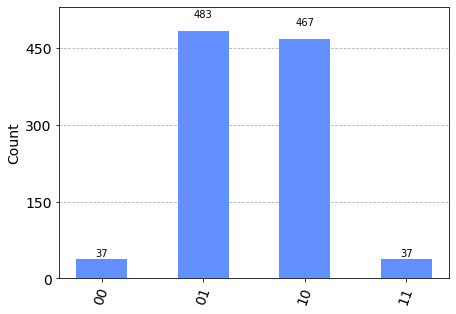

In [10]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import random_statevector

# Creamos tres qubits, el que queremos teletransportar, uno auxiliar y otro de medición
q = QuantumRegister(3, name='q') # qubit cuantico
c = ClassicalRegister(2, name='c') # bit clasico
qc = QuantumCircuit(q, c)

# Create random 1-qubit state
psi = random_statevector(2)

# Preparamos el qubit que queremos teletransportar en un estado específico
qc.initialize(psi, q[0])

# Preparamos el estado de entrelazamiento entre el qubit auxiliar y el qubit de medición
qc.h(q[1]) # Hadamard
qc.cx(q[1], q[2]) # CNOT

# Aplicamos las compuertas controladas para transferir el estado del qubit que queremos teletransportar al qubit auxiliar
qc.cx(q[0], q[1]) # CNOT
qc.h(q[0]) # Hadamard

# Realizamos la medición del qubit auxiliar y del qubit de medición
qc.measure(q[1], c[0])
qc.measure(q[2], c[1])

# Ejecutamos el circuito en un simulador local
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1024).result()
counts = result.get_counts()

# Imprimimos los resultados de la simulación
print(counts)
plot_histogram(counts)


{'11': 123, '01': 400, '00': 121, '10': 380}


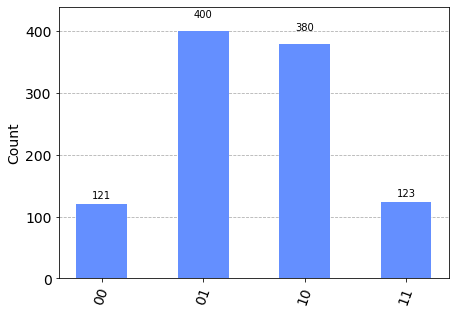

In [12]:
from qiskit import *
from qiskit.visualization import plot_histogram

# Creamos tres qubits, el que queremos teletransportar, uno auxiliar y otro de medición
q = QuantumRegister(3, name='q') # qubit cuantico
c = ClassicalRegister(2, name='c') # bit clasico
qc = QuantumCircuit(q, c)

# Create random 1-qubit state
psi = random_statevector(2)

# Preparamos el qubit que queremos teletransportar en un estado específico
qc.initialize(psi, q[0])

# Preparamos el estado de entrelazamiento entre el qubit auxiliar y el qubit de medición
qc.h(q[1]) # Hadamard
qc.cx(q[1], q[2]) # CNOT

# Aplicamos las compuertas controladas para transferir el estado del qubit que queremos teletransportar al qubit auxiliar
qc.cx(q[0], q[1]) # CNOT
qc.h(q[0]) # Hadamard

# Realizamos la medición del qubit auxiliar y del qubit de medición
qc.measure(q[1], c[0])
qc.measure(q[2], c[1])

# Ejecutamos el circuito en un simulador local
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator, shots=1024).result()
counts = result.get_counts()

# Imprimimos los resultados de la simulación
print(counts)
plot_histogram(counts)


In [14]:
# En ambos simuladores se obtuvieron dos resultados mayormente visibles, cada uno con una probabilidad cercana al 50%.
# El el estado cuántico original es aleatorio y desconocido, por lo que no podemos verificar visualmente que la implementación 
# haya funcionado correctamente. Sin embargo, podemos ver que el estado del qubit auxiliar se encuentra en una superposición de los estados |0⟩ y |1⟩,